#Linear regression

## import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

In [ ]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

## plot target values vs features

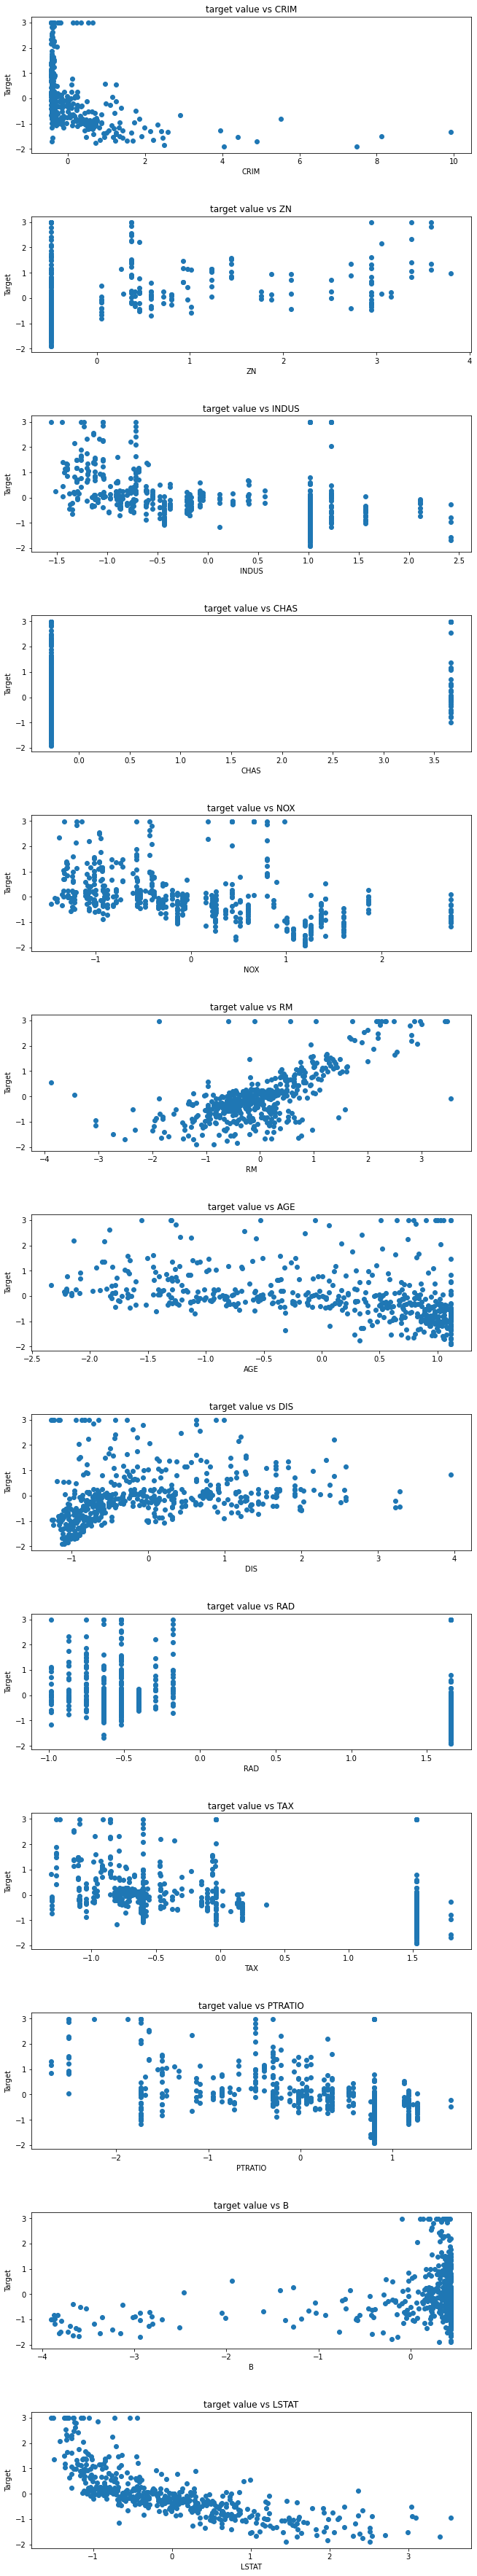

In [ ]:
features_list=list(X.columns)
fig, axs = plt.subplots(13, 1, figsize=(10, 50))
for i,feature in enumerate(features_list):
    axs[i].scatter(list(X[feature]),list(y))
    axs[i].set_title(f"target value vs {feature}")
    axs[i].set_xlabel(f"{feature}")
    axs[i].set_ylabel('Target')

fig.tight_layout(pad=4.0)    
plt.show()

## correlation

Text(0.5, 1.0, 'correlation for all features')

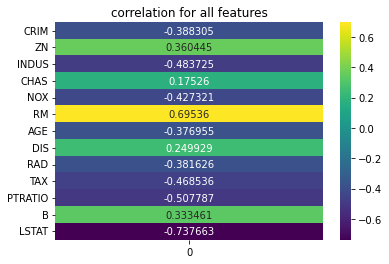

In [ ]:
cor=pd.DataFrame(X.corrwith(y))
sns.heatmap(cor, annot=True, fmt="g", cmap='viridis').set_title('correlation for all features')

## *explanation:*
in the above image, i plot correlation between each feature and target value. as we can see `RM` `LSTAT` `PTRATIO` are features with most correlation (here magnitude of correlation is important and features can be positively or negatively correlated)


## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


### 1-write down close form of linear regression

$$
minimize \ c(x)=\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$

$$
expanded \ c(x)=\frac{1}{2} (Y^{T}Y+W^{T}\phi^{T}\phi W-2W^{T}\phi^{T}Y+\lambda W^TW)
$$

$$
derivative \  c(x)=c'(x) =(\phi^{T}\phi W-\phi^{T}Y+\lambda W)
$$

$$
c'(x)=0 → (\phi^{T}\phi W-\phi^{T}Y+\lambda W)=0
$$

$$
W^{*}=(\phi^T\phi-\lambda I)^{-1}\phi^{T}Y
$$



### 2-now use this close form to obtain good weight for this problem

In [ ]:
#this is just template you are free to implement is however you want. add many cell as you wish
#------------------------------------
class LinearRegressionModel: #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self):
        
        self.W=0

    def fit(self,X,y,regularization):
        X=np.array(X)
        y=np.array(y)
        m = X.shape[0] # Number of training examples. 
        n= X.shape[-1]
        phi=np.append(X, np.ones((m,1)), axis=1)
        #-------------------------- 
        y=np.array(y)
        y=y.reshape(m,1)
        #--------------------------
        self.W = np.dot(np.linalg.inv(np.dot(phi.T, phi)+regularization*np.identity(n+1)), np.dot(phi.T, y))

    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        y=np.array(y)
        y=y.reshape(-1,1)
        #---------------------
        yhat=self.transform(X)
        eror=1/y.shape[0]*np.sqrt(np.sum((y-yhat)**2))
        #---------------------
        return eror
        
    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        X=np.array(X)
        m = X.shape[0] # Number of training examples. 
        phi=np.append(X, np.ones((m,1)), axis=1)
        yhat=np.dot(phi,self.W)
        #---------------
        return yhat
    
    def get_param(self):
        "return w "
        return self.W

## plot target values and original values in one plot 

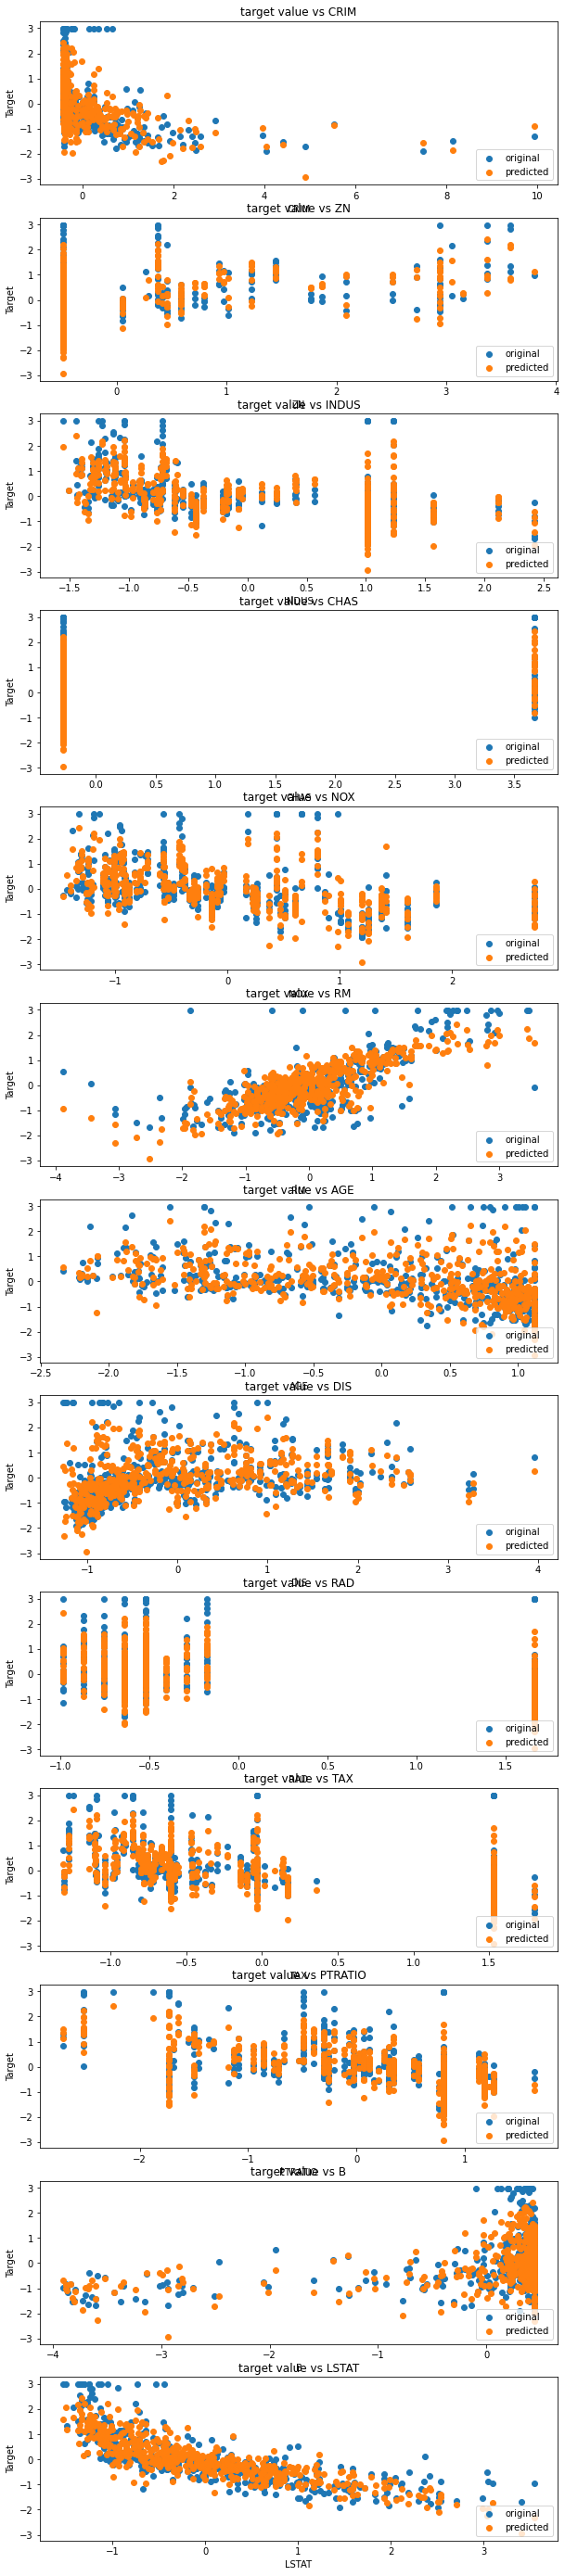

In [ ]:
clf=LinearRegressionModel()
clf.fit(X_train,y_train,0.01)
fig, axs = plt.subplots(13, 1, figsize=(10, 50))
for i,feature in enumerate(X.columns):
    axs[i].scatter(list(X[feature]),list(y))
    axs[i].scatter(list(X[feature]),list(clf.transform(X)))
    axs[i].legend(('original','predicted'), loc ='lower right')
    axs[i].set_title(f"target value vs {feature}")
    axs[i].set_xlabel(f"{feature}")
    axs[i].set_ylabel('Target')

plt.show()    

### 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'norm vs lambda')

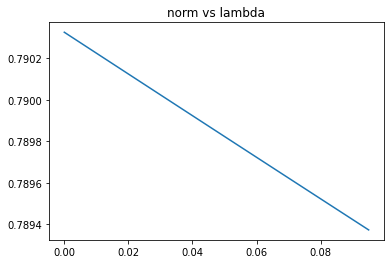

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

### 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'eror vs lambda')

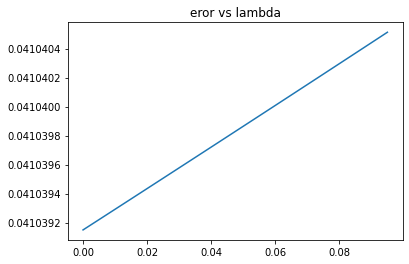

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### 6-explain effect of regularization : 

we want our model  to works well not only with training or test data, but also with the data it'll receive in the future. In summary, to achieve this, regularization shrinks the weights toward zero to discourage complex models

* in the above case, becuase our model didn't see enough data, using regularization, avoid our model from training better. that is why eror becomes greater as lambda goes up. 

### 7-add square of each feature to data set and repeat 4,5,6

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
#---------------------------------------------
## add square of feature 
for columns in X_train.columns : 
    X_train[columns]=X_train[columns]+X_train[columns]**2
    X_test[columns]=X_test[columns]+X_test[columns]**2


#### plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'norm vs lambda')

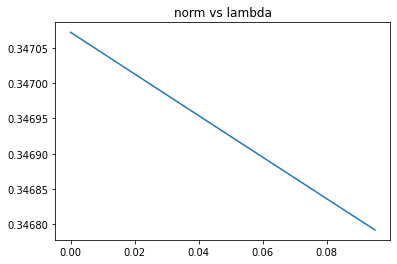

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

#### plot regularization - test_error with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'eror vs lambda')

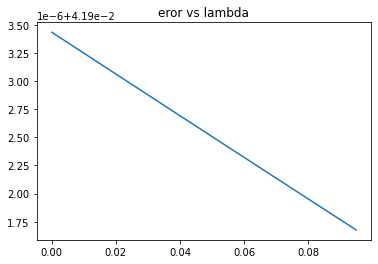

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### 8-add square and power of three of each feature to data set and repeat 4,5,6

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
#---------------------------------------------
## add square of feature 
for columns in X_train.columns : 
    X_train[columns]=X_train[columns]+X_train[columns]**2+X_train[columns]**3
    X_test[columns]=X_test[columns]+X_test[columns]**2+X_test[columns]**3

#### plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'norm vs lambda')

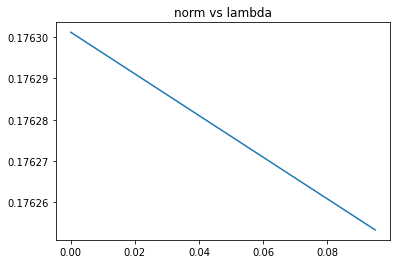

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

#### plot regularization - test_error with lambda between 0 to 0.1 with step 0.005

Text(0.5, 1.0, 'eror vs lambda')

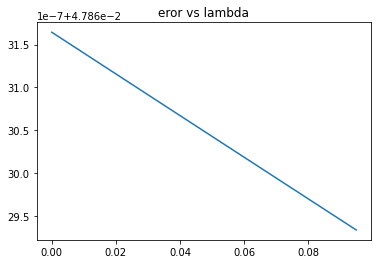

In [ ]:
clf=LinearRegressionModel()
lambda_list=np.arange(0,0.1,0.005)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### compare part  7th  test error and previous one explain how 7 and 8 are helping model to do better work

why using polynomial transformation help model to fit better? 
Polynomial feature transformation, extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, X, X2, and X3, as predictors. This approach provides a simple way to provide a non-linear fit to data.

as we can see above, error of cubic regression is less than square regression. also we can see that error of square regression is less than linear regression .

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

### 1-write down gradient descent update formulation

$$
newton \ raphson \ method \ : \ W^{k+1}=W^{k}-H_{k}^{-1}G_{k}
$$

$$
\ where  \ H_{k} \ is \ hessian \ matrix \ and \ G_{k} \ is \ gradient \ vector \ of \ loss \ function.
$$

$$
from \ previous \ part \ we \ know \ that \ G_{k}= \phi^{T}\phi W-2ϕ^{T}Y+2λW
$$

$$
for \ H_{k} \ we \ have \  H_{k}=(\phi^{T}\phi-\lambda I)^{-1}
$$


In [ ]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

### 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method

In [ ]:
#this is just template you are free to implement is however you want.
class LinearRegressionModelGD:
    #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    def __init__(self):
        
        self.W=0

    def fit(self,X,y,regularization,steps=10):
        X=np.array(X)
        y=np.array(y)
        m = X.shape[0] # Number of training examples. 
        n= X.shape[-1]
        phi=np.append(X, np.ones((m,1)), axis=1)
        W=np.zeros([n+1,1])
        #-------------------------- 
        y=np.array(y)
        y=y.reshape(m,1)
        #--------------------------
        h_mat_inv=np.linalg.inv(np.dot(phi.T,phi)+regularization*np.identity(n+1))
        grad_vector = lambda x: np.dot(np.dot(phi.T,phi),x)+2*regularization*x-2*np.dot(phi.T,y)

        for step in range(steps):
            W=W-h_mat_inv@grad_vector(W)
        self.W=W    

    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        y=np.array(y)
        y=y.reshape(-1,1)
        #---------------------
        yhat=self.transform(X)
        eror=1/y.shape[0]*np.sqrt(np.sum((y-yhat)**2))
        #---------------------
        return eror
        
    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        X=np.array(X)
        m = X.shape[0] # Number of training examples. 
        phi=np.append(X, np.ones((m,1)), axis=1)
        yhat=np.dot(phi,self.W)
        #---------------
        return yhat
    
    def get_param(self):
        "return w "
        return self.W

### 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other features so that you can see how the distributions vary

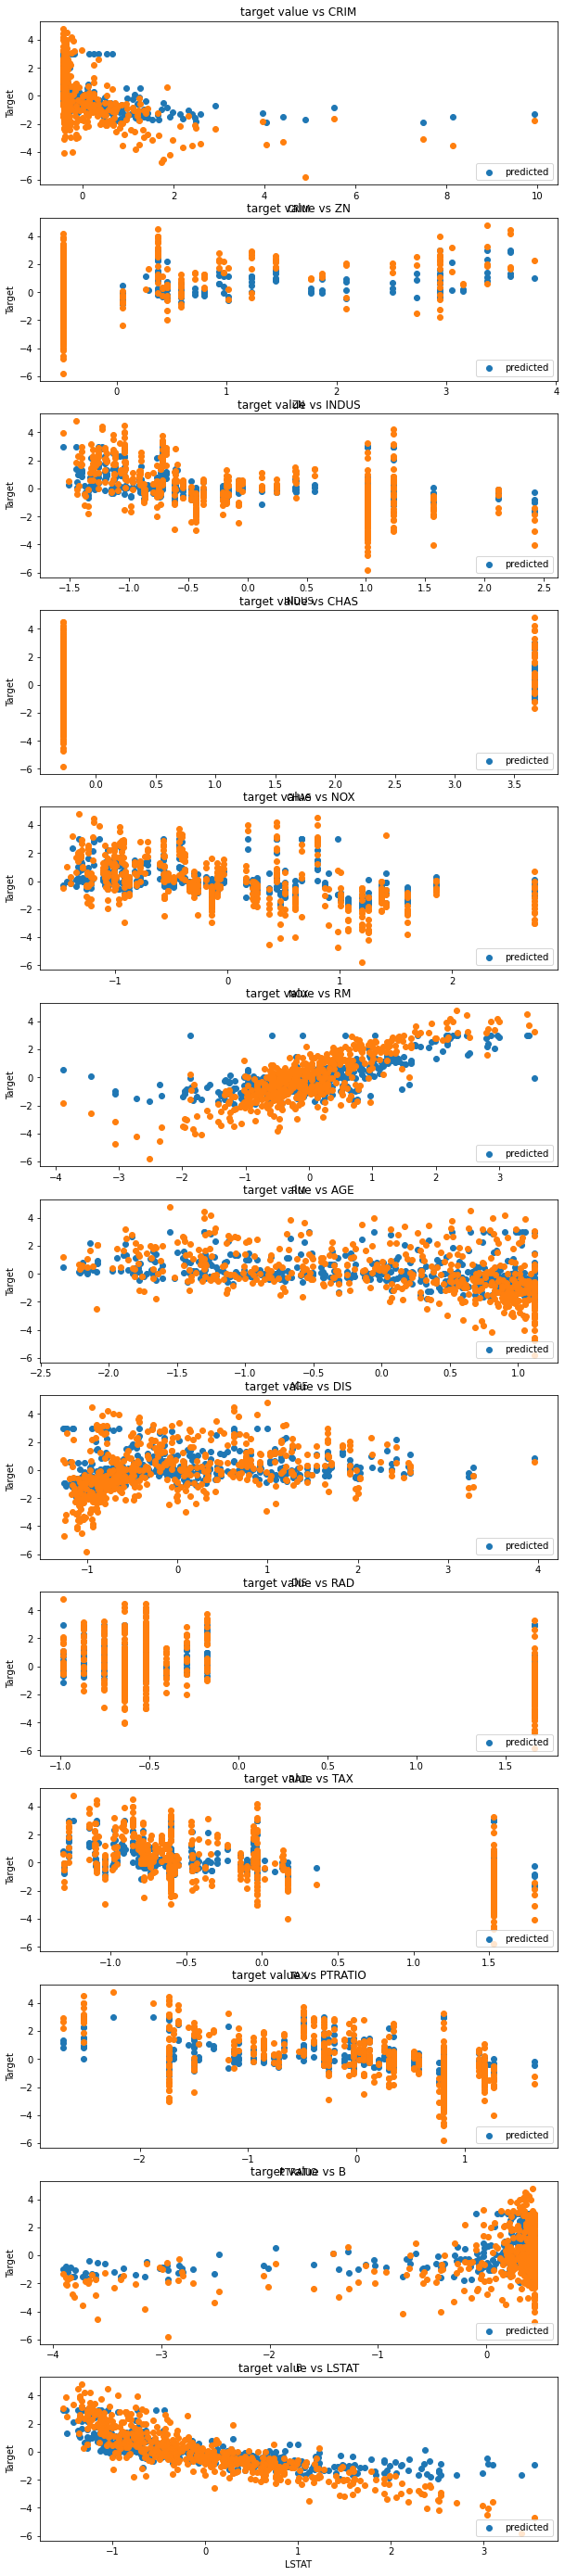

In [ ]:
clf=LinearRegressionModelGD()
clf.fit(X,y,1)
fig, axs = plt.subplots(13, 1, figsize=(10, 50))
for i,feature in enumerate(features_list):
    axs[i].scatter(list(X[feature]),list(y))
    axs[i].legend(('original','predicted'), loc ='lower center')
    axs[i].scatter(list(X[feature]),list(clf.transform(X)))
    axs[i].legend(('predicted',), loc ='lower right')
    axs[i].set_title(f"target value vs {feature}")
    axs[i].set_xlabel(f"{feature}")
    axs[i].set_ylabel('Target')

plt.show()   

### 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'norm vs lambda')

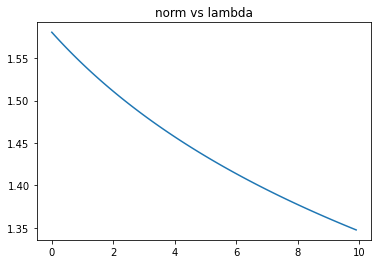

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

### 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'eror vs lambda')

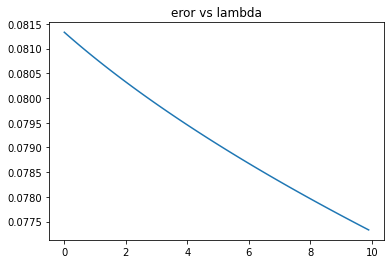

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### 6-explain effect of regularization

we want our model  to works well not only with training or test data, but also with the data it'll receive in the future. In summary, to achieve this, regularization shrinks the weights toward zero to discourage complex models

* you can see the effect of regularization above. as lambda goes up, eror rate decreases approximatly exponentialy


### 7-add square of each feature to data set and repeat 4,5,6

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
#---------------------------------------------
## add square of feature 
for columns in X_train.columns : 
    X_train[columns]=X_train[columns]+X_train[columns]**2
    X_test[columns]=X_test[columns]+X_test[columns]**2


#### plot regularization - weights_norm with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'norm vs lambda')

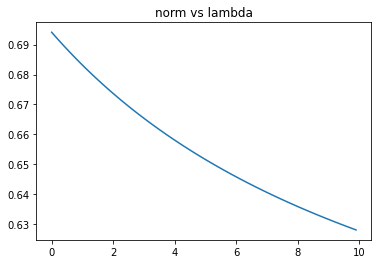

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

#### plot regularization - test_error with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'eror vs lambda')

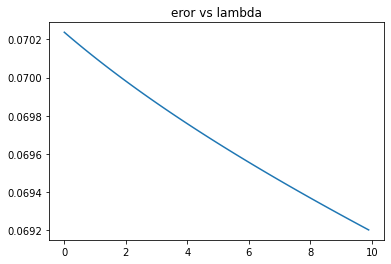

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### add square and power of three of each feature to data set and repeat

In [ ]:
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
#---------------------------------------------
## add square of feature 
for columns in X_train.columns : 
    X_train[columns]=X_train[columns]+X_train[columns]**2+X_train[columns]**3
    X_test[columns]=X_test[columns]+X_test[columns]**2+X_test[columns]**3

#### plot regularization - weights_norm with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'norm vs lambda')

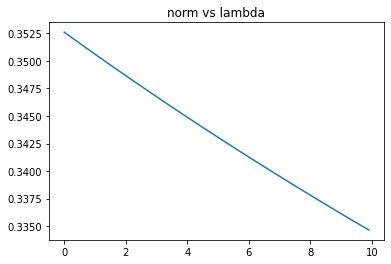

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
norm_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    weight=clf.get_param()
    norm=np.linalg.norm(weight)
    norm_list.append(norm)
plt.plot(lambda_list,norm_list)
plt.title("norm vs lambda")

#### plot regularization - test_error with lambda between 0 to 10 with step 0.1

Text(0.5, 1.0, 'eror vs lambda')

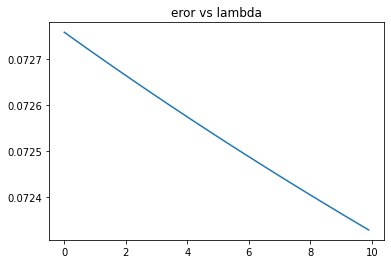

In [ ]:
clf=LinearRegressionModelGD()
lambda_list=np.arange(0,10,0.1)
eror_list=[]
for lambda_ in lambda_list:
    clf.fit(X_train,y_train,lambda_)
    eror=clf.evaluate(X_test,y_test)
    eror_list.append(eror)
plt.plot(lambda_list,eror_list)
plt.title("eror vs lambda")

### compare part  7th  test error and previous one explain how 7 and 8 are helping model to do better work

why using polynomial transformation help model to fit better? 
Polynomial feature transformation, extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, X, X2, and X3, as predictors. This approach provides a simple way to provide a non-linear fit to data.

as we can see above, error of cubic regression is less than square regression. also we can see that error of square regression is less than linear regression .